In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Veri yükleme
file_path = 'C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/Augmented_Labeled_Data.csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,AccX.1,AccY.1,AccZ.1,GyroX.1,...,GyroY.58,GyroZ.58,AccX.59,AccY.59,AccZ.59,GyroX.59,GyroY.59,GyroZ.59,Label,Activity
0,9.935937,0.833182,0.921768,-0.231822,0.010658,-0.083936,9.957485,0.545878,1.005565,-0.148420,...,-0.569963,-0.347201,10.967838,1.735796,1.154005,-0.148420,-0.174799,-0.406355,0,HIGHKNEES
1,9.959879,1.094150,0.531513,-0.125770,0.009326,-0.021850,10.005369,1.005565,0.550666,-0.132965,...,-0.285115,-0.134564,10.019734,-0.057461,1.805228,0.401825,-0.360524,-0.114046,0,HIGHKNEES
2,9.923966,1.201889,0.684742,-0.077541,0.013856,-0.014922,9.933543,1.211466,0.656011,-0.077008,...,-0.306432,-0.176132,9.425972,0.102951,2.750938,-0.151351,-0.197715,-0.225427,0,HIGHKNEES
3,9.967062,1.067814,0.459687,-0.094328,-0.012790,-0.008260,10.067618,1.039083,0.430956,-0.104986,...,-0.051960,-0.225427,9.308656,-0.404620,2.513912,0.024248,-0.356527,-0.209972,0,HIGHKNEES
4,10.067618,0.802058,0.423774,-0.087400,0.022916,-0.043700,10.022128,0.711078,0.462081,-0.042368,...,-0.062352,-0.259002,10.347740,-0.059855,1.161188,-0.237685,-0.238750,-0.322420,0,HIGHKNEES


In [5]:
# Özellikler ve etiketlerin ayrılması
X = data.drop(['Label', 'Activity'], axis=1)
y = data['Activity']

In [6]:
# Etiketleri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)

[0 0 0 ... 4 4 4]


In [7]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [8]:
# Eğitim ve test setindeki veri miktarını yazdırma
print(f'Eğitim için kullanılan veri miktarı: {X_train.shape[0]}')
print(f'Test için kullanılan veri miktarı: {X_test.shape[0]}')

Eğitim için kullanılan veri miktarı: 1400
Test için kullanılan veri miktarı: 600


In [9]:
# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Keras Sequential modelini oluşturma
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [11]:
# Modeli derleme
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Modeli eğitme
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5254 - loss: 1.1365 - val_accuracy: 0.9821 - val_loss: 0.2088
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9954 - loss: 0.1040 - val_accuracy: 0.9964 - val_loss: 0.0289
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0105 - val_accuracy: 0.9964 - val_loss: 0.0194
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0068 - val_accuracy: 0.9929 - val_loss: 0.0213
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9964 - val_loss: 0.0157
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9964 - val_loss: 0.0089
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9964 - val_loss: 0.0098
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9964 - val_loss:

In [13]:
# Modeli değerlendirme
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.9989 - loss: 0.0027   
Test Loss: 0.007939164526760578
Test Accuracy: 0.996666669845581


In [14]:
# Tahminleri yapma
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [15]:
# Sınıflandırma raporunu yazdırma
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

   HIGHKNEES       0.99      0.99      0.99       103
 JUMPINGJACK       0.99      0.99      0.99       110
      PUSHUP       1.00      1.00      1.00       129
       SITUP       1.00      1.00      1.00       118
       SQUAT       1.00      1.00      1.00       140

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [16]:
# Modeli kaydetme (sadece model mimarisini)
model.save('C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/har_model.keras')
print("Model saved to C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/har_model.keras")

Model saved to C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/har_model.keras


In [17]:
# Ağırlıkları kaydetme
model.save_weights('C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/har_model_weights.weights.h5')
print("Model weights saved to C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/har_model_weights.weights.h5")

Model weights saved to C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/har_model_weights.weights.h5


In [18]:
# Label encoder kaydetme
joblib.dump(label_encoder, 'C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/label_encoder.pkl')
print("Label encoder saved to C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/label_encoder.pkl")

Label encoder saved to C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/label_encoder.pkl


In [19]:
# Scaler'ı kaydetme
joblib.dump(scaler, 'C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/scaler.pkl')
print("Scaler saved to C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/scaler.pkl")

Scaler saved to C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/scaler.pkl


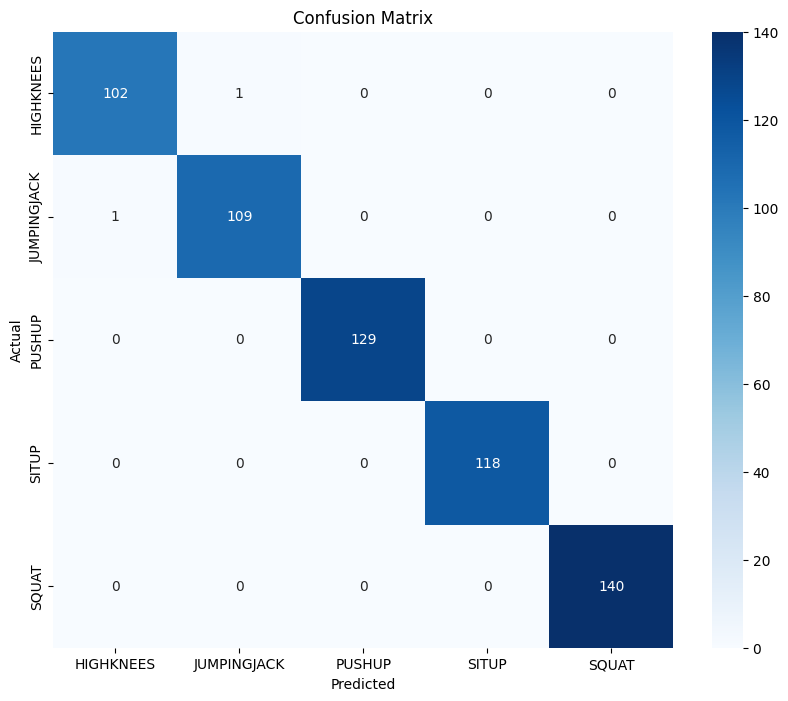

In [20]:
# Karışıklık matrisini yazdırma ve görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/confusion_matrix.png')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step


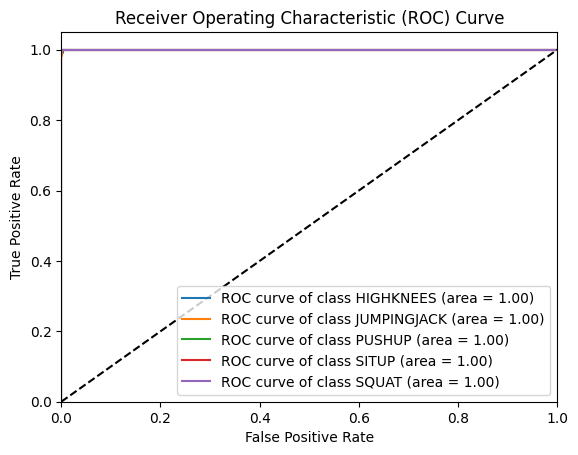

In [21]:
# ROC eğrisi ve AUC skoru
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, model.predict(X_test_scaled)[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/roc_curve.png')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


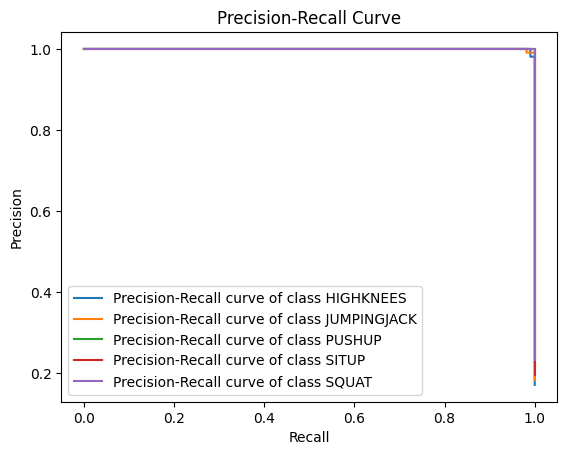

In [22]:
# Precision-Recall eğrisi
precision = dict()
recall = dict()
for i in range(len(label_encoder.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test, model.predict(X_test_scaled)[:, i], pos_label=i)

plt.figure()
for i in range(len(label_encoder.classes_)):
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve of class {label_encoder.classes_[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.savefig('C:/Users/Asus-Pc/Desktop/HAR Updates/HAR_Data/precision_recall_curve.png')
plt.show()